In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.tree import _tree
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score
from skmultilearn.problem_transform import LabelPowerset
from sklearn.preprocessing import LabelEncoder
from pydot import graph_from_dot_data
from sklearn.preprocessing import StandardScaler
sns.set()

In [2]:
df = pd.read_csv('../data/diagnosis.data', encoding='utf-16', sep='\t', names=['Temperature','Nausea','LumbarPain','UrinePushing','MicturitionPains','Burning','Inflammation','Nephritis'], header=None)
df.head()

,Temperature,Nausea,LumbarPain,UrinePushing,MicturitionPains,Burning,Inflammation,Nephritis
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no


In [3]:
for i in range(df.shape[0]):
    string = df.at[i, 'Temperature']
    df.at[i, 'Temperature'] = string.replace(',', '.')
df.head()

,Temperature,Nausea,LumbarPain,UrinePushing,MicturitionPains,Burning,Inflammation,Nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [4]:
tranforms = ['Nausea','LumbarPain','UrinePushing','MicturitionPains','Burning','Inflammation','Nephritis']
df[tranforms] = df[tranforms].apply(LabelEncoder().fit_transform)
df.head()

,Temperature,Nausea,LumbarPain,UrinePushing,MicturitionPains,Burning,Inflammation,Nephritis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


In [5]:
predictors = df.iloc[:, :-2]
response = LabelPowerset(classifier = DecisionTreeClassifier(criterion='entropy', random_state = 42)).transform(df.iloc[:, -2:])
response

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 0, 0, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 3, 0, 2,
       3, 3, 0, 2, 3, 3, 0, 2, 2, 2, 3, 3, 2, 3, 0, 2, 2, 3, 3, 0, 2, 2,
       3, 0, 2, 2, 3, 2, 0, 2, 2, 2])

In [6]:
model = DecisionTreeClassifier(criterion='entropy', random_state = 42)
model.fit(predictors, response)

DecisionTreeClassifier(criterion='entropy', random_state=42)

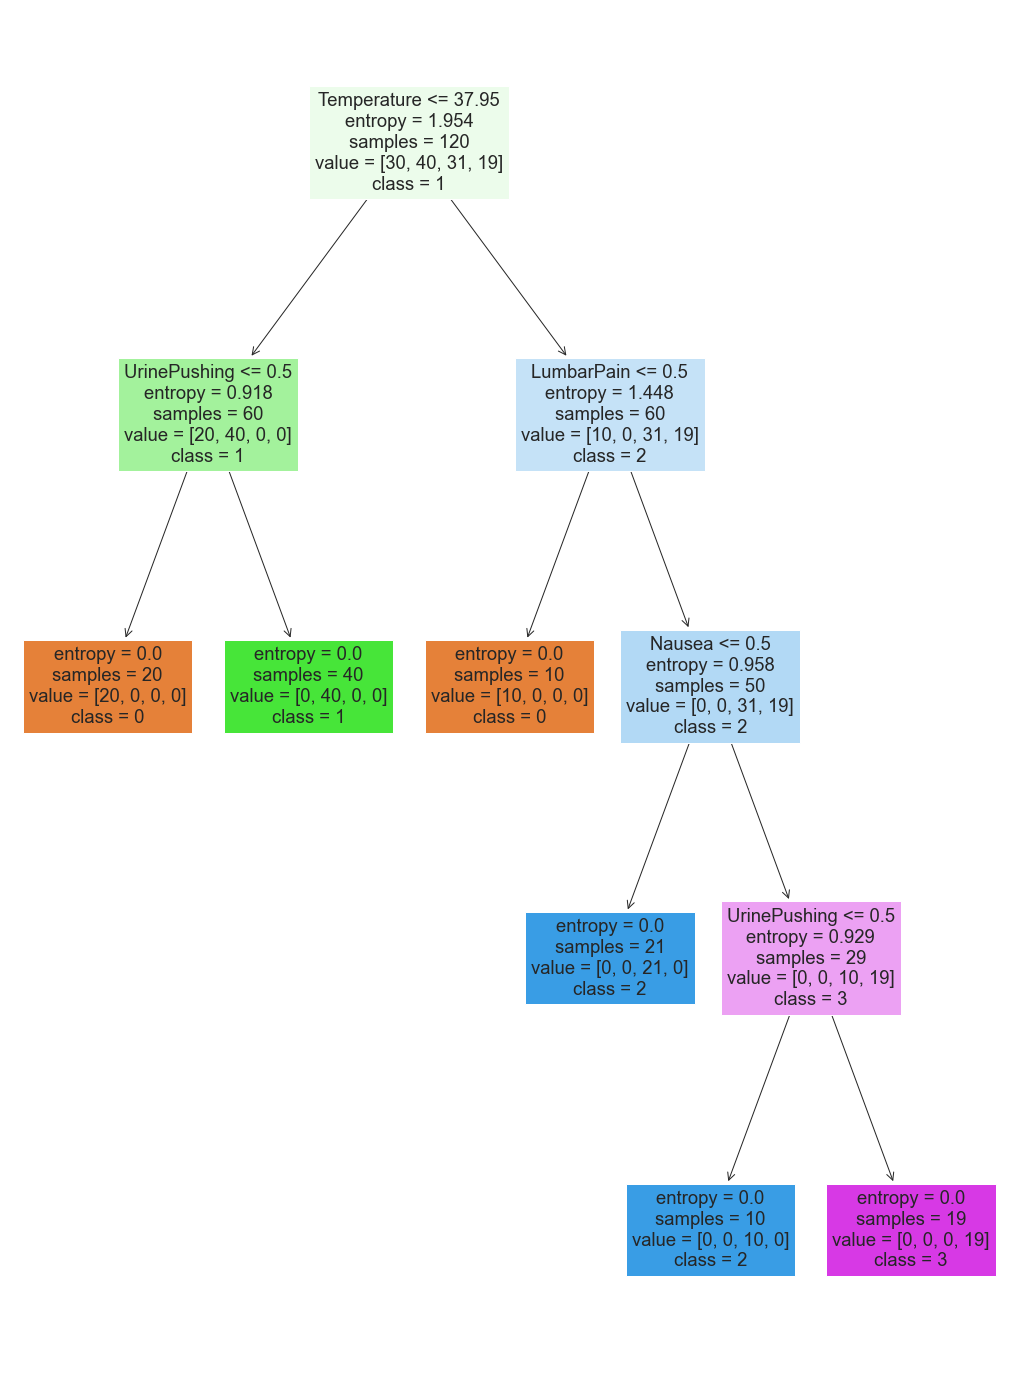

In [7]:
fig = plt.figure(figsize=(18,25))
tree.plot_tree(model, feature_names = list(predictors.columns), class_names=['0','1','2','3'], filled = True);

In [8]:
def tree_to_code(tree, feature_names):

    tree_ = tree.tree_
    feature_name = [feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature]
    
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [9]:
tree_to_code(model, list(predictors.columns))

def tree(Temperature, Nausea, LumbarPain, UrinePushing, MicturitionPains, Burning):
  if Temperature <= 37.95000076293945:
    if UrinePushing <= 0.5:
      return [[20.  0.  0.  0.]]
    else:  # if UrinePushing > 0.5
      return [[ 0. 40.  0.  0.]]
  else:  # if Temperature > 37.95000076293945
    if LumbarPain <= 0.5:
      return [[10.  0.  0.  0.]]
    else:  # if LumbarPain > 0.5
      if Nausea <= 0.5:
        return [[ 0.  0. 21.  0.]]
      else:  # if Nausea > 0.5
        if UrinePushing <= 0.5:
          return [[ 0.  0. 10.  0.]]
        else:  # if UrinePushing > 0.5
          return [[ 0.  0.  0. 19.]]


In [10]:
model = DecisionTreeClassifier(criterion='entropy', random_state = 42)
path = model.cost_complexity_pruning_path(predictors, response)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [11]:
ccp_alphas

array([0.        , 0.19959209, 0.32501121, 0.45914792, 0.77042604])

In [12]:
for i in ccp_alphas:
    model = DecisionTreeClassifier(criterion='entropy', random_state = 42, ccp_alpha=i)
    score = cross_val_score(model, predictors, response, cv=5)
    print("Alpha:", i)
    print("Score:", score)
    print("--------------------------------------------------------------------")

Alpha: 0.0
Score: [0.83333333 1.         1.         1.         1.        ]
--------------------------------------------------------------------
Alpha: 0.1995920879638124
Score: [0.83333333 0.83333333 0.83333333 0.83333333 0.75      ]
--------------------------------------------------------------------
Alpha: 0.32501121082417717
Score: [0.70833333 0.83333333 0.83333333 0.66666667 0.58333333]
--------------------------------------------------------------------
Alpha: 0.4591479170272448
Score: [0.45833333 0.58333333 0.58333333 0.66666667 0.58333333]
--------------------------------------------------------------------
Alpha: 0.7704260414863779
Score: [0.33333333 0.33333333 0.33333333 0.58333333 0.58333333]
--------------------------------------------------------------------


#### Minimal Decision Tree obtained at ccp_alpha = 0

In [13]:
model = DecisionTreeClassifier(criterion='entropy', random_state = 42, ccp_alpha=0)
model.fit(predictors, response)

DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', random_state=42)

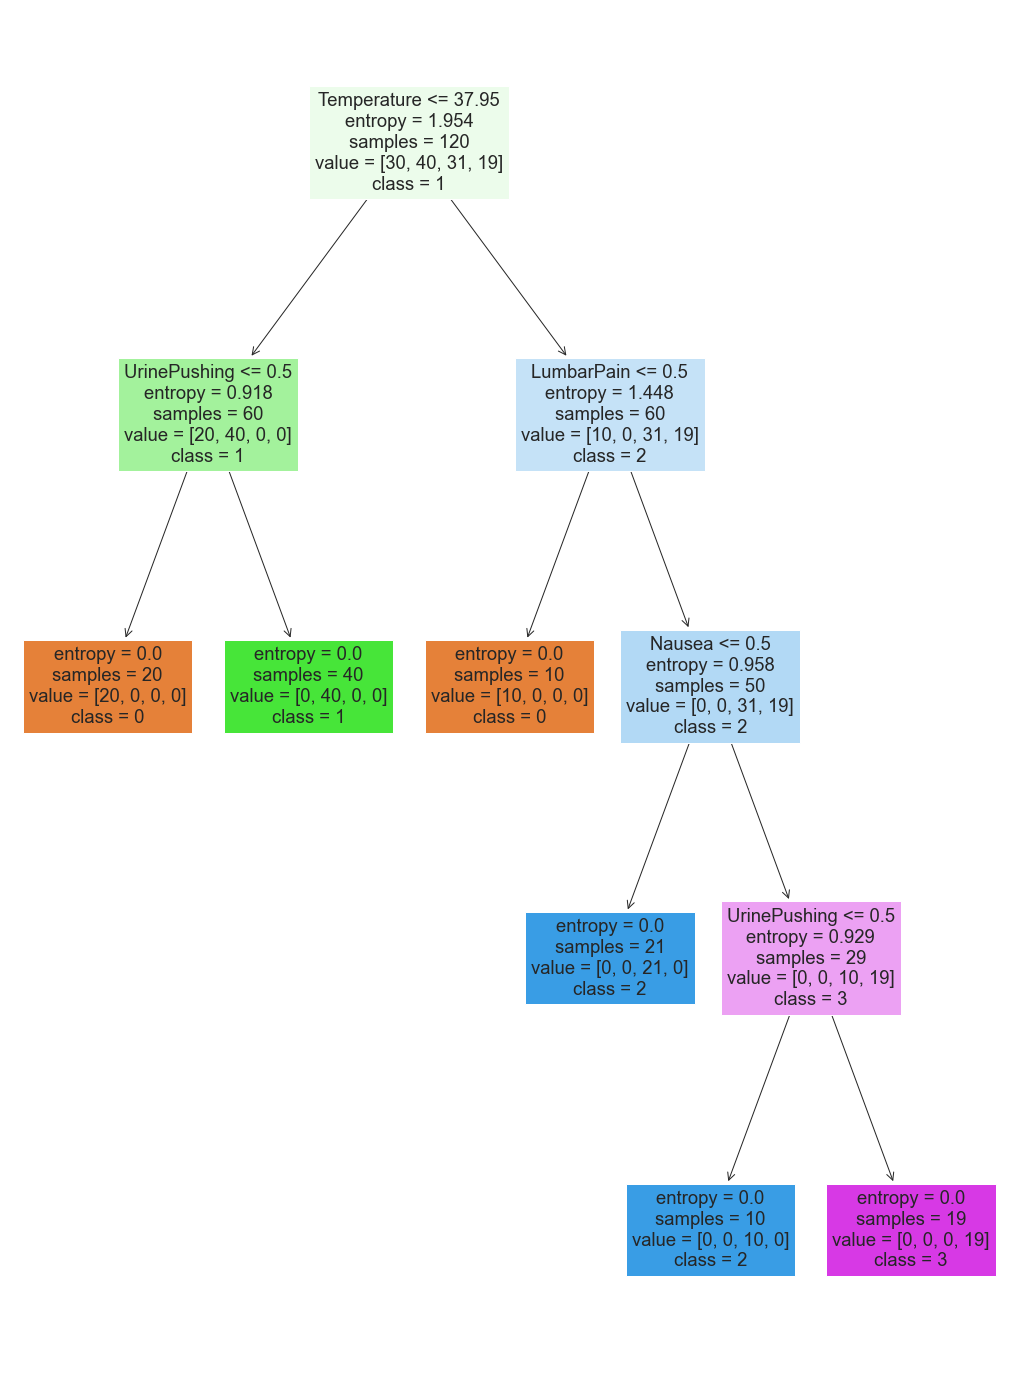

In [14]:
fig = plt.figure(figsize=(18,25))
tree.plot_tree(model, feature_names = list(predictors.columns), class_names=['0','1','2','3'], filled = True);

In [15]:
tree_to_code(model, list(predictors.columns))

def tree(Temperature, Nausea, LumbarPain, UrinePushing, MicturitionPains, Burning):
  if Temperature <= 37.95000076293945:
    if UrinePushing <= 0.5:
      return [[20.  0.  0.  0.]]
    else:  # if UrinePushing > 0.5
      return [[ 0. 40.  0.  0.]]
  else:  # if Temperature > 37.95000076293945
    if LumbarPain <= 0.5:
      return [[10.  0.  0.  0.]]
    else:  # if LumbarPain > 0.5
      if Nausea <= 0.5:
        return [[ 0.  0. 21.  0.]]
      else:  # if Nausea > 0.5
        if UrinePushing <= 0.5:
          return [[ 0.  0. 10.  0.]]
        else:  # if UrinePushing > 0.5
          return [[ 0.  0.  0. 19.]]


In [16]:
df1 = pd.read_csv("../data/communities.data", names = ["state", "county", "community", "communityname", "fold", "population", "householdsize", "racepctblack", "racePctWhite", "racePctAsian", "racePctHisp", "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up", "numbUrban", "pctUrban", "medIncome", "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire", "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap", "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy", "PctEmplManu", "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par", "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom", "NumIlleg", "PctIlleg", "NumImmig", "PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10", "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup", "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous", "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart", "RentLowQ", "RentMedian", "RentHighQ", "MedRent", "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet", "PctForeignBorn", "PctBornSameState", "PctSameHouse85", "PctSameCity85", "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop", "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic", "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack", "PctPolicHisp", "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits", "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea", "PopDens", "PctUsePubTrans", "PolicCars", "PolicOperBudg", "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn", "PolicBudgPerPop", "ViolentCrimesPerPop"])
df1

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [17]:
train_set = df1.iloc[:1495, :]
print("Train set size:", np.shape(train_set))
test_set = df1.iloc[1495:, :]
print("Test set size:", np.shape(test_set))

Train set size: (1495, 128)
Test set size: (499, 128)


In [18]:
df1.iloc[:, 5:] = df1.iloc[:, 5:].replace('?', np.nan)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df1.iloc[:, 5:] = imputer.fit_transform(df1.iloc[:, 5:]) 
df1

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


<AxesSubplot:>

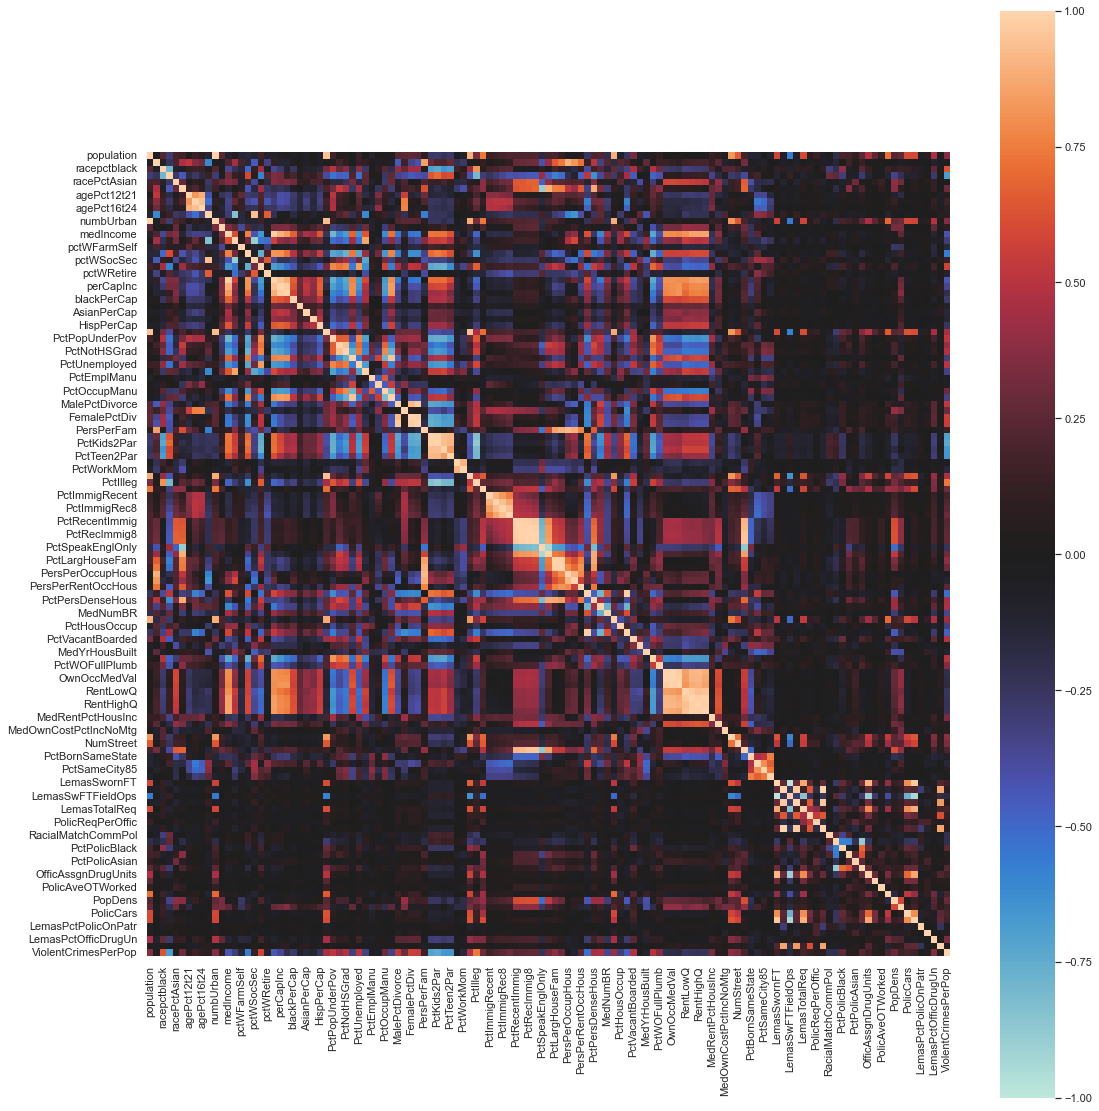

In [19]:
corr = df1.iloc[:, 5:].corr()
fig = plt.figure(figsize=(18,20))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True)

In [20]:
corr

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
population,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,0.006368,0.130344,0.075596,-0.102006,...,0.713652,0.231897,0.270356,0.609147,0.595543,-0.061583,0.076527,0.466352,-0.035576,0.367157
householdsize,-0.046148,1.000000,-0.067109,-0.235907,0.201996,0.468659,0.520461,0.367338,0.295225,-0.612666,...,-0.015078,-0.004072,-0.051506,-0.032663,-0.007584,-0.006426,-0.000280,-0.094368,-0.054562,-0.034923
racepctblack,0.231178,-0.067109,1.000000,-0.794389,-0.106738,-0.066581,0.122338,0.153475,0.134068,0.052934,...,0.149758,0.095053,0.147023,0.122017,0.083179,-0.082660,0.010987,0.260793,0.022237,0.631264
racePctWhite,-0.300845,-0.235907,-0.794389,1.000000,-0.270266,-0.444166,-0.194015,-0.266852,-0.183804,0.136483,...,-0.131389,-0.337458,-0.215636,-0.109191,-0.114860,0.052940,-0.033209,-0.276234,-0.006323,-0.684770
racePctAsian,0.181603,0.201996,-0.106738,-0.270266,1.000000,0.266743,-0.025020,0.100727,0.052761,-0.272020,...,-0.001084,0.389944,0.296921,-0.017992,0.067745,0.032389,0.065424,0.101888,-0.011619,0.037622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LemasPctPolicOnPatr,-0.061583,-0.006426,-0.082660,0.052940,0.032389,0.024366,0.000652,0.013327,0.013687,0.005601,...,-0.067678,0.055734,0.023457,-0.115349,-0.089736,1.000000,0.007179,0.021153,-0.237240,-0.039002
LemasGangUnitDeploy,0.076527,-0.000280,0.010987,-0.033209,0.065424,0.025956,0.011271,0.005145,-0.001001,-0.042756,...,0.109830,-0.076634,-0.082946,0.078436,0.023349,0.007179,1.000000,-0.015712,-0.021100,0.055038
LemasPctOfficDrugUn,0.466352,-0.094368,0.260793,-0.276234,0.101888,0.125353,0.001301,0.117290,0.083180,-0.010168,...,0.299632,0.228084,0.206644,-0.052426,-0.062677,0.021153,-0.015712,1.000000,0.018649,0.348627
PolicBudgPerPop,-0.035576,-0.054562,0.022237,-0.006323,-0.011619,0.002234,-0.076589,-0.068575,-0.049876,0.076586,...,-0.113166,0.067199,0.080024,0.245532,0.259342,-0.237240,-0.021100,0.018649,1.000000,0.045466


In [21]:
cv = {}
for i in range(5, df1.shape[1]):
    cv[df1.columns[i]] = df1.iloc[:, i].std()/df1.iloc[:, i].mean()
print("The Coefficient of Variation for the columns 5 to 128 are:")
cv

The Coefficient of Variation for the columns 5 to 128 are:


{'population': 2.203502536390972,
 'householdsize': 0.3532983018683109,
 'racepctblack': 1.4109203963756864,
 'racePctWhite': 0.3237815624993411,
 'racePctAsian': 1.3591621938222074,
 'racePctHisp': 1.614277791710685,
 'agePct12t21': 0.36583986883972397,
 'agePct12t29': 0.29069288841904145,
 'agePct16t24': 0.4951605143654288,
 'agePct65up': 0.42344170889026195,
 'numbUrban': 2.0017436381957676,
 'pctUrban': 0.6388488712113656,
 'medIncome': 0.5797533935755996,
 'pctWWage': 0.3277100586060616,
 'pctWFarmSelf': 0.7000301156104908,
 'pctWInvInc': 0.35923994722340613,
 'pctWSocSec': 0.36851263032540155,
 'pctWPubAsst': 0.699030504203365,
 'pctWRetire': 0.3496390828575848,
 'medFamInc': 0.527731885342079,
 'perCapInc': 0.545633428419145,
 'whitePerCap': 0.5075521907214038,
 'blackPerCap': 0.5894690036844645,
 'indianPerCap': 0.8096850868666168,
 'AsianPerCap': 0.6061938508790911,
 'OtherPerCap': 0.6706445725467309,
 'HispPerCap': 0.4739597186074789,
 'NumUnderPov': 2.304969714852185,
 'PctP

In [22]:
sqrt = int(np.floor(128**0.5))
top_cv = list(dict(sorted(cv.items(), key = itemgetter(1), reverse = True)[:sqrt]).keys())
print("The selected features are:\n", top_cv)

The selected features are:
 ['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'numbUrban', 'HousVacant', 'LandArea', 'racePctHisp']


In [23]:
new_df = pd.DataFrame()
for i in top_cv:
    new_df[i] = df1[i]
new_df

,NumStreet,NumInShelters,NumIlleg,NumImmig,LemasPctOfficDrugUn,NumUnderPov,population,numbUrban,HousVacant,LandArea,racePctHisp
0,0.00,0.04,0.04,0.03,0.32,0.08,0.19,0.20,0.21,0.12,0.17
1,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.02,0.02,0.07
2,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.04
3,0.00,0.00,0.03,0.02,0.00,0.01,0.04,0.06,0.01,0.02,0.10
4,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.04,0.05
...,...,...,...,...,...,...,...,...,...,...,...
1989,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.03,0.02,0.01,0.16
1990,0.00,0.01,0.03,0.05,0.00,0.04,0.05,0.06,0.03,0.02,0.32
1991,0.02,0.06,0.13,0.06,0.91,0.12,0.16,0.17,0.21,0.08,0.25
1992,0.01,0.04,0.02,0.06,0.22,0.03,0.08,0.09,0.05,0.03,0.10


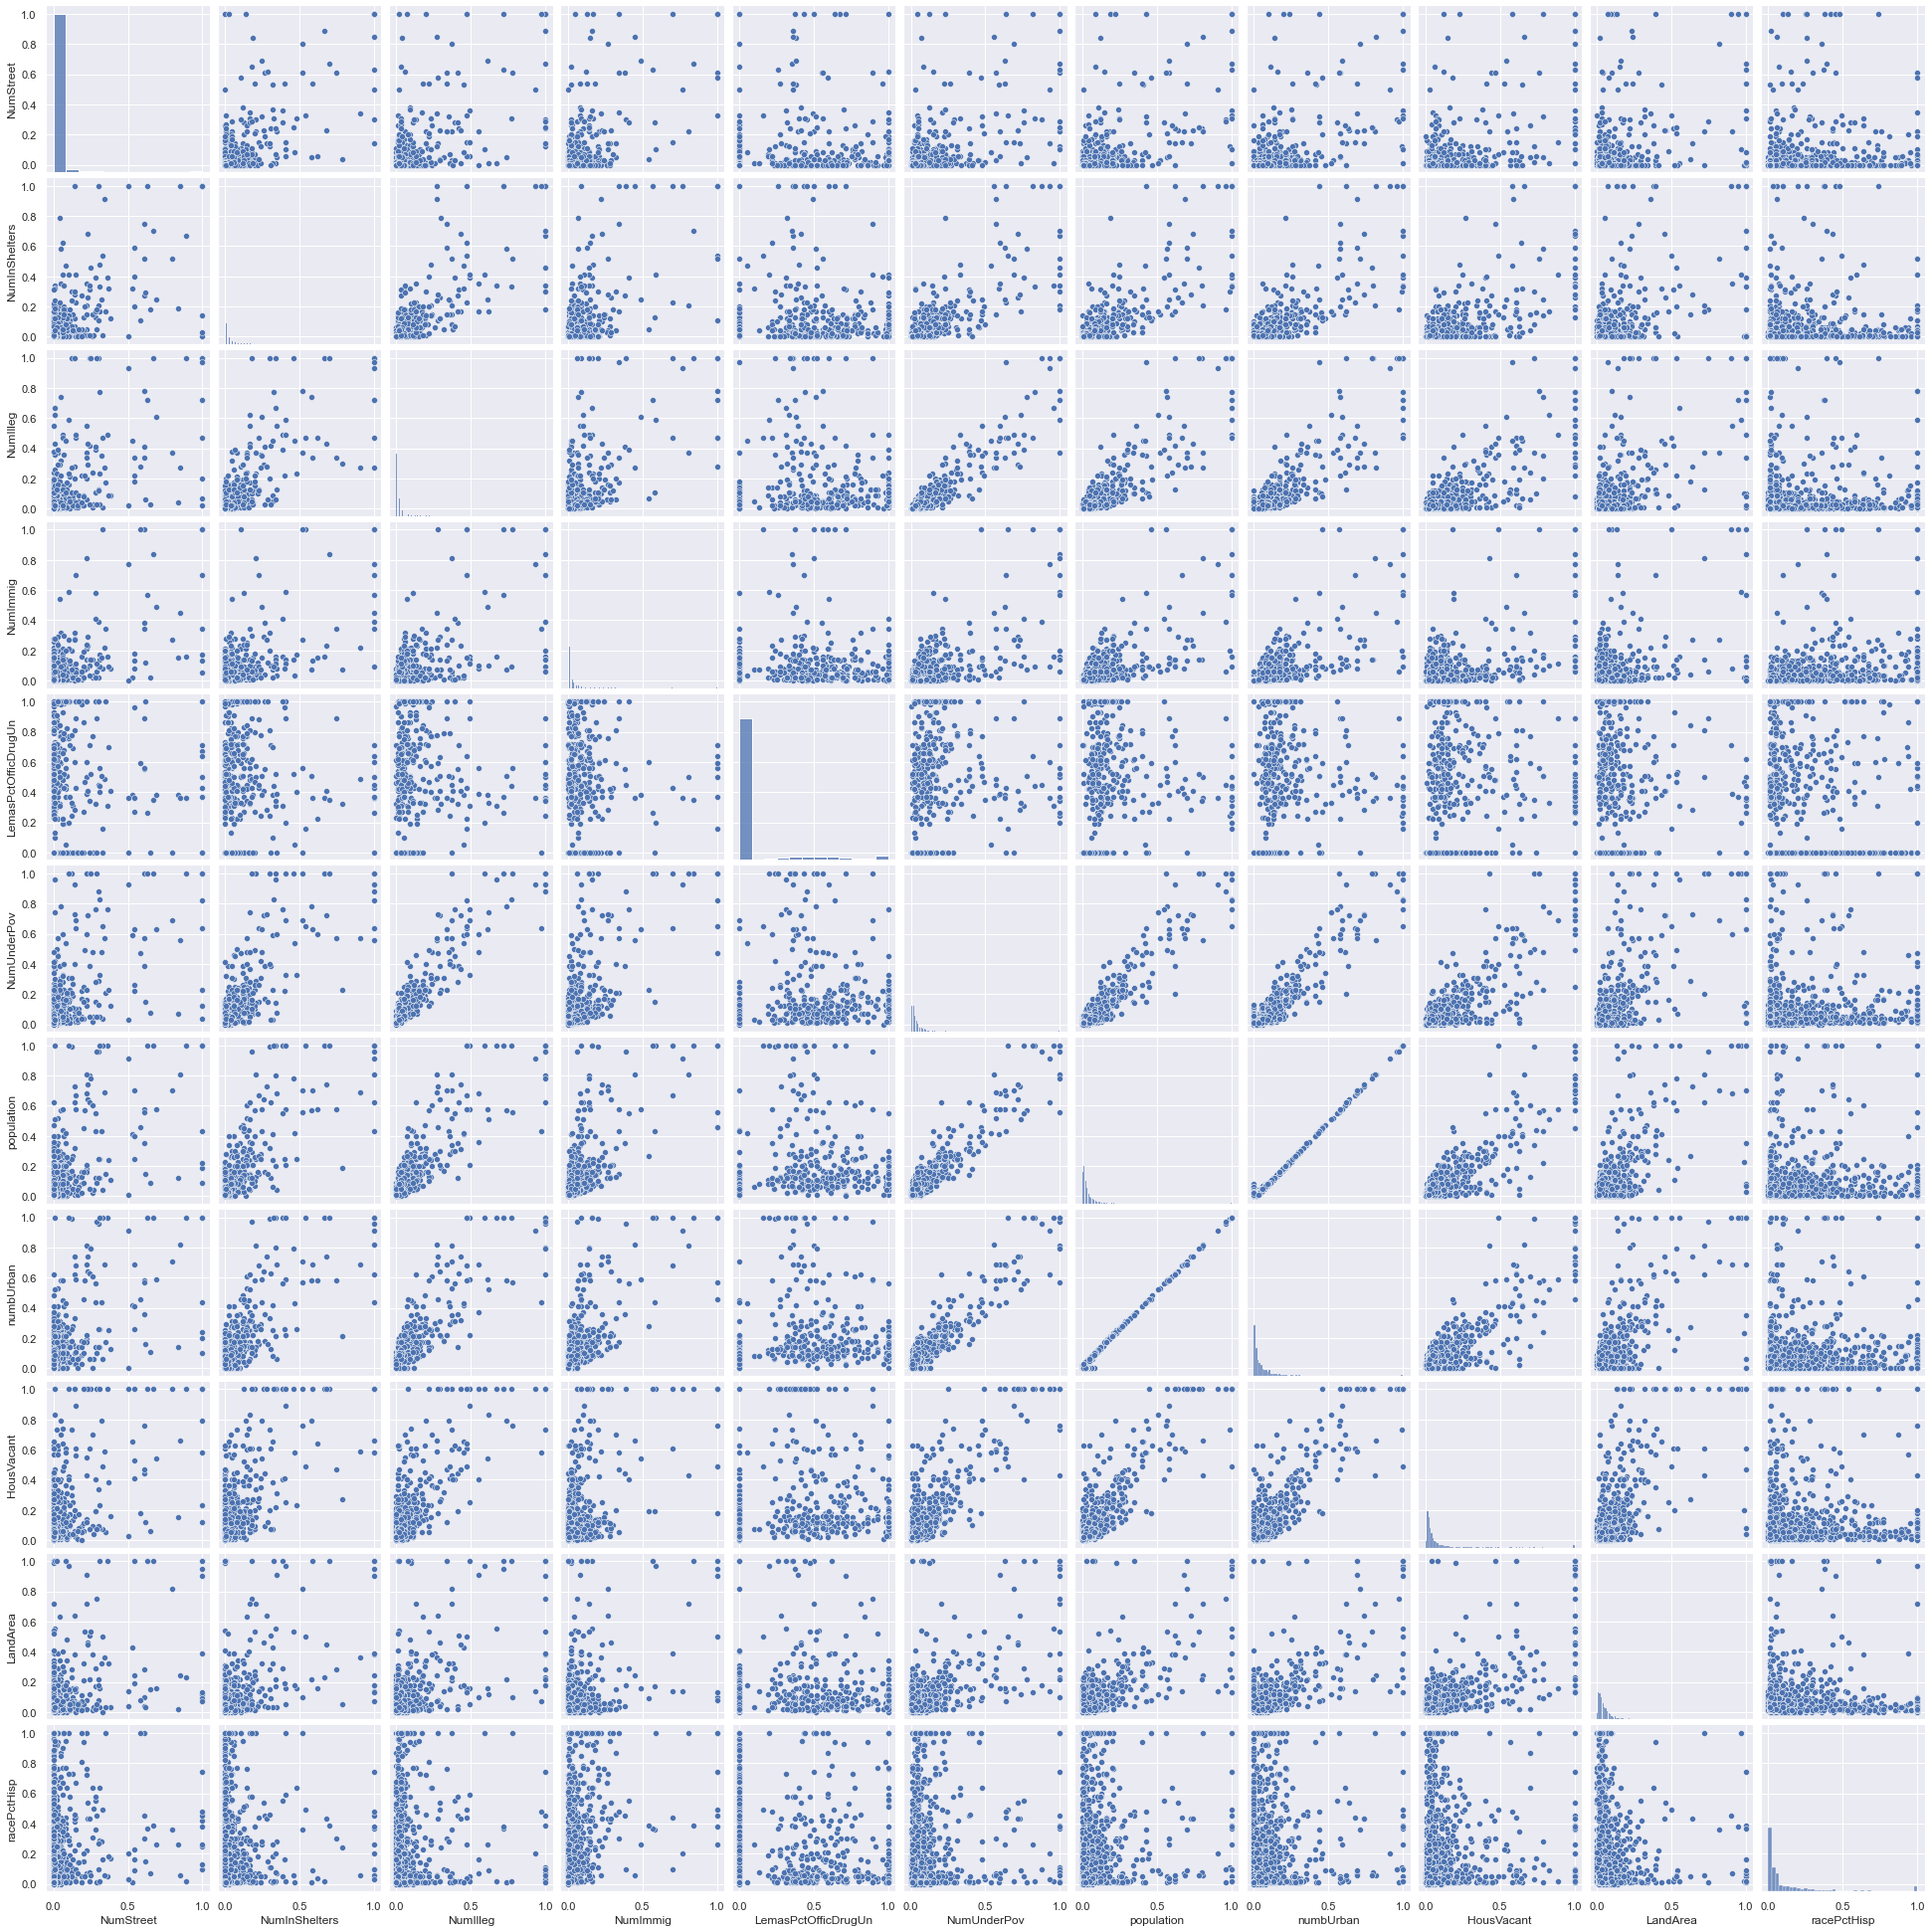

In [24]:
sns.pairplot(new_df, kind = 'scatter')

<AxesSubplot:>

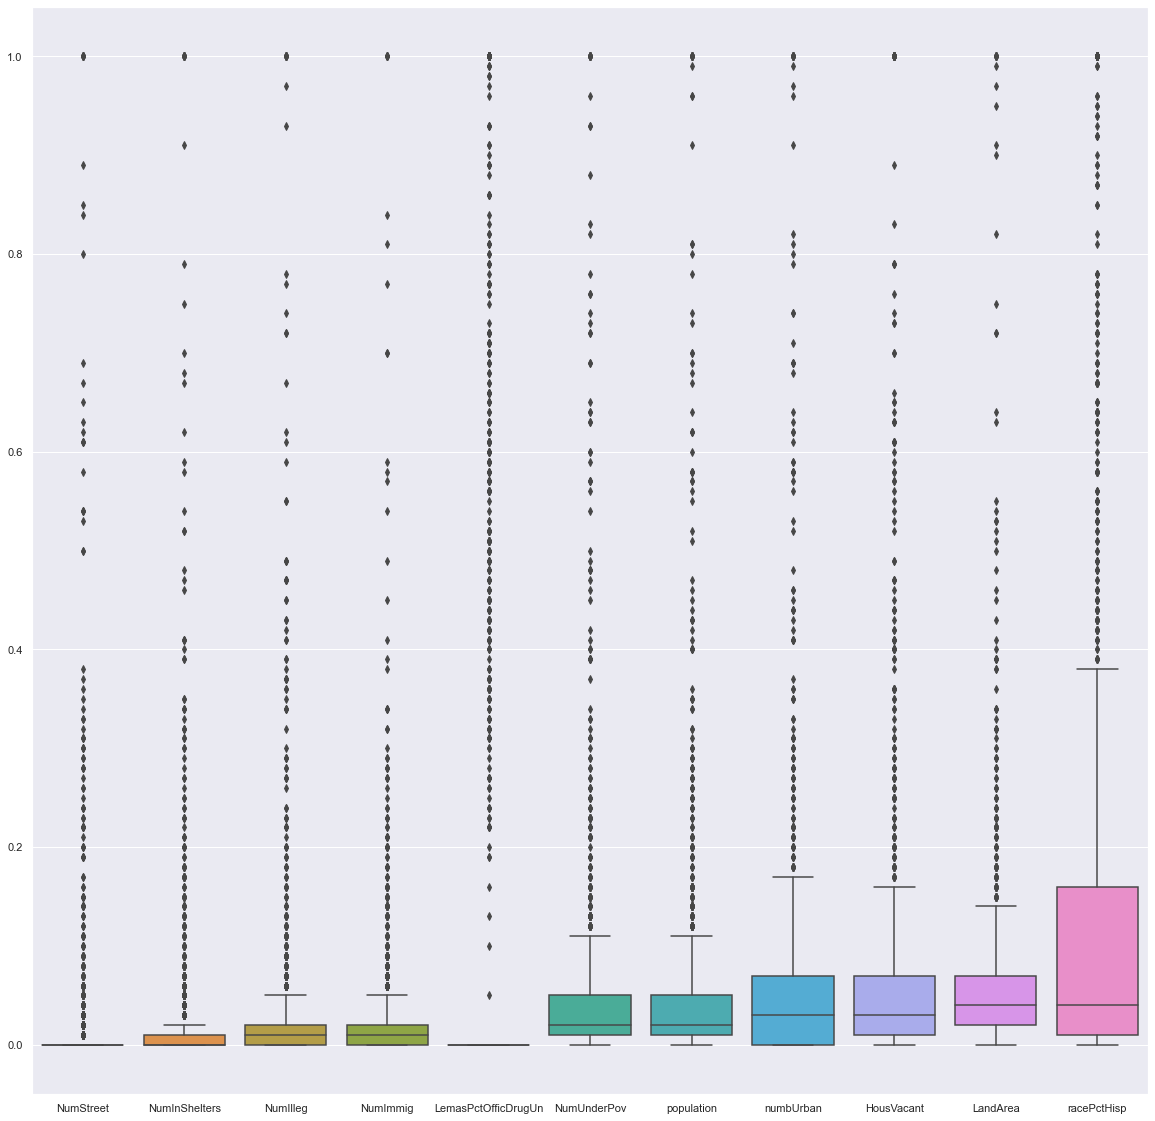

In [25]:
plt.figure(figsize=(20,20))
sns.boxplot(data=new_df)

In [26]:
dataset = df1.iloc[:, 5:127]
dataset.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.305987,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.305987,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.305987,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.305987,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078


In [27]:
train_X = df1.iloc[:1495, 5:-1]
print(train_X.shape)
train_y = df1.iloc[:1495, -1]
print(train_y.shape)
test_X = df1.iloc[1495:, 5:-1]
print(test_X.shape)
test_y = df1.iloc[1495:, -1]
print(test_y.shape)

(1495, 122)
(1495,)
(499, 122)
(499,)


In [28]:
model = LinearRegression()
model.fit(train_X, train_y)
predictions = model.predict(test_X)
error = mean_squared_error(test_y, predictions)
print("Test error (MSE):", error)

Test error (MSE): 0.7897255274396451


In [29]:
model = RidgeCV(alphas=[0.001, 0.01, 1, 10, 100, 1000])
model.fit(train_X, train_y)
predictions = model.predict(test_X)
error = mean_squared_error(test_y, predictions)
print("Best lambda:", model.alpha_)
print("Test error (MSE) at the best lambda:", error)

Best lambda: 1.0
Test error (MSE) at the best lambda: 0.017737081104299317


In [30]:
model = LassoCV(alphas=[0.001, 0.01, 1, 10, 100, 1000])
model.fit(train_X, train_y)
predictions = model.predict(test_X)
error = mean_squared_error(test_y, predictions)
print("Best lambda:", model.alpha_)
print("Test error (MSE) at the best lambda:", error)

Best lambda: 0.001
Test error (MSE) at the best lambda: 0.01754528781156862


In [31]:
coef = model.coef_
selected_features = list(dataset.columns[coef != 0.0])
print("The number of selected variables are:", len(selected_features))
print("\nThe selected variables are:\n", selected_features)

The number of selected variables are: 23

The selected variables are:
 ['racepctblack', 'racePctWhite', 'agePct12t29', 'pctUrban', 'pctWPubAsst', 'AsianPerCap', 'MalePctDivorce', 'PctKids2Par', 'PctYoungKids2Par', 'PctWorkMom', 'PctIlleg', 'PctRecImmig10', 'PctPersDenseHous', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'MedRentPctHousInc', 'MedOwnCostPctIncNoMtg', 'NumStreet', 'PctForeignBorn', 'PctSameCity85', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn']


In [32]:
scale = StandardScaler()
train_X = scale.fit_transform(train_X) 
test_X = scale.fit_transform(test_X) 

In [33]:
model = LassoCV(alphas=[0.001, 0.01, 1, 10, 100, 1000])
model.fit(train_X, train_y)
predictions = model.predict(test_X)
new_error = mean_squared_error(test_y, predictions)
print("Best lambda:", model.alpha_)
print("Test error (MSE) at the best lambda:", error)

Best lambda: 0.001
Test error (MSE) at the best lambda: 0.01754528781156862


In [34]:
coef = model.coef_
selected_features = list(dataset.columns[coef != 0.0])
print("The number of selected variables are:", len(selected_features))
print("\nThe selected variables are:\n", selected_features)

The number of selected variables are: 68

The selected variables are:
 ['racepctblack', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec5', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctWOFullPlumb', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctSameCity85', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'PolicReqPerOffic', 'RacialMatchCommPol', 'Pc

In [35]:
print("Test MSE in non-standardized data:", error)
print("Test MSE in standardized data:", new_error)

Test MSE in non-standardized data: 0.01754528781156862
Test MSE in standardized data: 0.017955051767110063


### The non-standardized data has a lower MSE as compared to the standardized data

In [36]:
linear = LinearRegression()
param_grid = {"pca__n_components": np.arange(1, 123)}
pca = PCA()
pipe = Pipeline(steps=[("pca", pca), ("linear", linear)])
grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(train_X, train_y)
print("Optimal value of M:", grid_search.best_params_["pca__n_components"])
print("Train error (MSE) at this optimal M:", -1*grid_search.best_score_)

Optimal value of M: 95
Train error (MSE) at this optimal M: 0.01934927921232629


In [37]:
model = make_pipeline(PCA(n_components=grid_search.best_params_["pca__n_components"]), LinearRegression())
model.fit(train_X, train_y)
predictions = model.predict(test_X)
print("Test error (MSE): ", mean_squared_error(test_y, predictions))

Test error (MSE):  0.01873584737827099


In [38]:
model = XGBRegressor()
pca = PCA()
params = {'reg_alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(model, params, scoring='neg_mean_squared_error')
grid_search.fit(train_X, train_y)
best_alpha = grid_search.best_params_['reg_alpha']
print("Best alpha:", best_alpha)
print("Train error (MSE) at the best alpha:", -1*grid_search.best_score_)

Best alpha: 1
Train error (MSE) at the best alpha: 0.021279235572332973


In [39]:
model = XGBRegressor(reg_alpha = best_alpha)
model.fit(train_X, train_y)
predictions = model.predict(test_X)
print("Test Error (MSE):", mean_squared_error(test_y, predictions))

Test Error (MSE): 0.017708772640840458
